# Advertising Sales Channel Prediction

### Description
#### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#checking the data dimension
df.shape

(200, 5)

In [5]:
df.columns # the Sales is the target variable that we have to predict.

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
df.drop('Unnamed: 0',axis=1, inplace=True)
# Here Unnamed: 0 does not effect on target column so removed it.

In [7]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.3 KB


In [9]:
#checking null values
df.isnull().sum()


TV           0
radio        0
newspaper    0
sales        0
dtype: int64

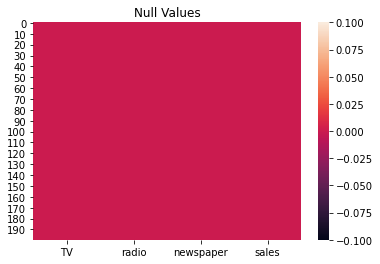

In [10]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()


In [11]:
#checking Datatypes
df.dtypes


TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [12]:
#statistical summary
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Here we observe that TV have maximum sales than rest.

### Uni-Variate Analysis

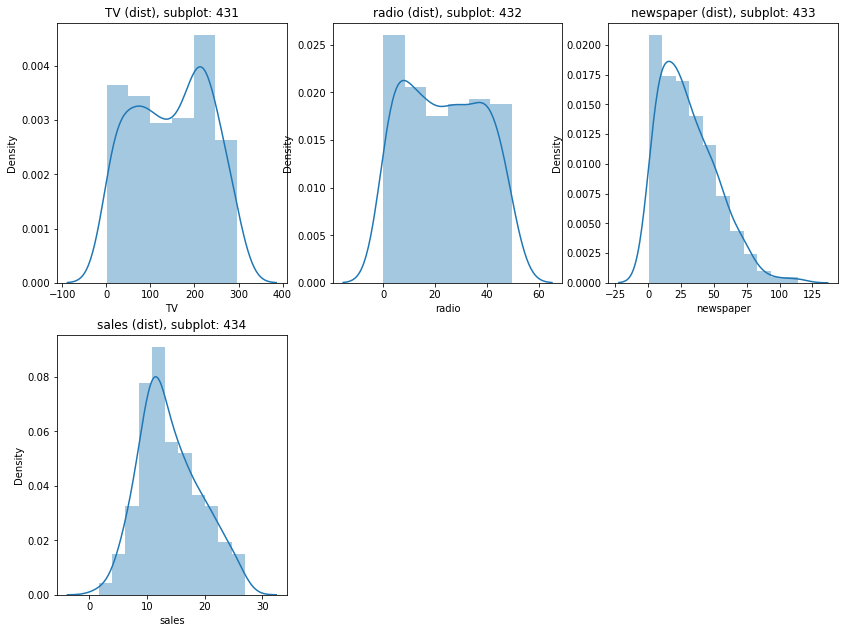

In [13]:
#Numerical Data
Columns= df.columns

#  plot Numerical Data
a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,22))

for i in Columns:
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(df[i])
    c = c + 1

plt.show()


Only Newspaper is right skewed.

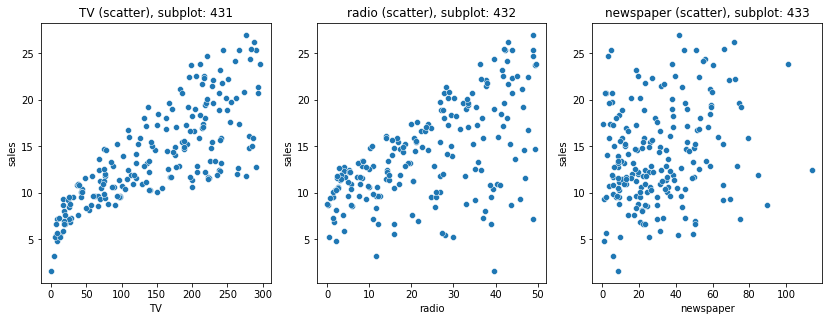

In [14]:
Columns = ['TV', 'radio', 'newspaper']

#  plot Numerical Data
a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,22))

for i in Columns:

    
    plt.subplot(a, b, c)
    plt.title('{} (scatter), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.scatterplot(data = df, x = i, y = 'sales')
    c = c + 1

plt.show()



### Multi Variate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

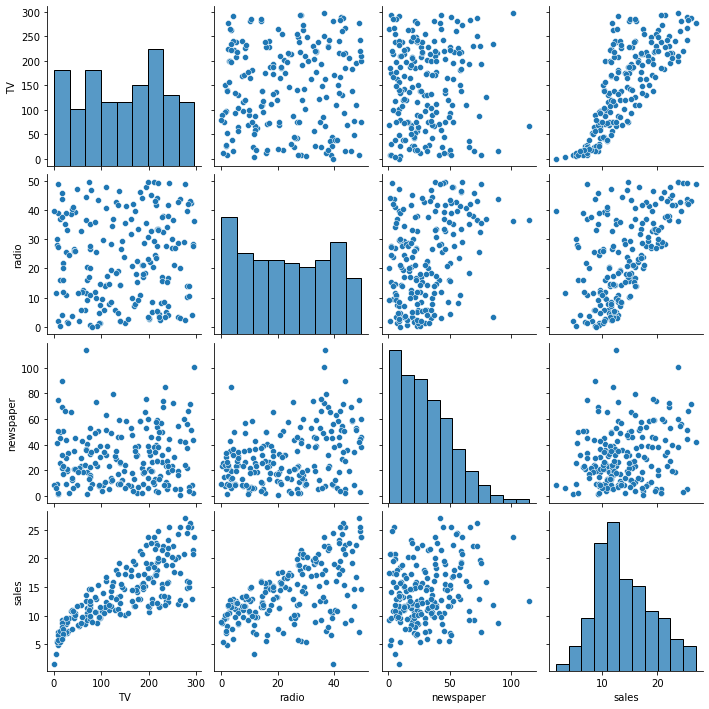

In [15]:
#Checking normal distribution of each column
sns.pairplot(df) 
plt.show

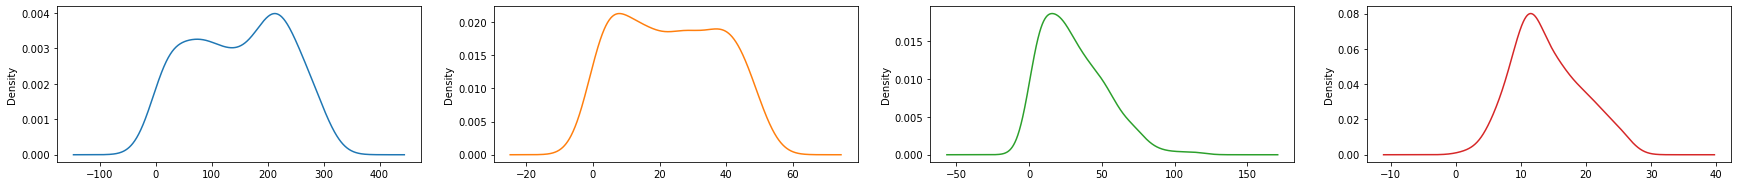

In [16]:
#Checking normal distribution of each column
df.plot(kind='density',subplots=True, layout=(6,4), sharex=False, legend=False, figsize=[30,20])
plt.show()

### Checking correlation

In [17]:
#Correlation
df.corr()


,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


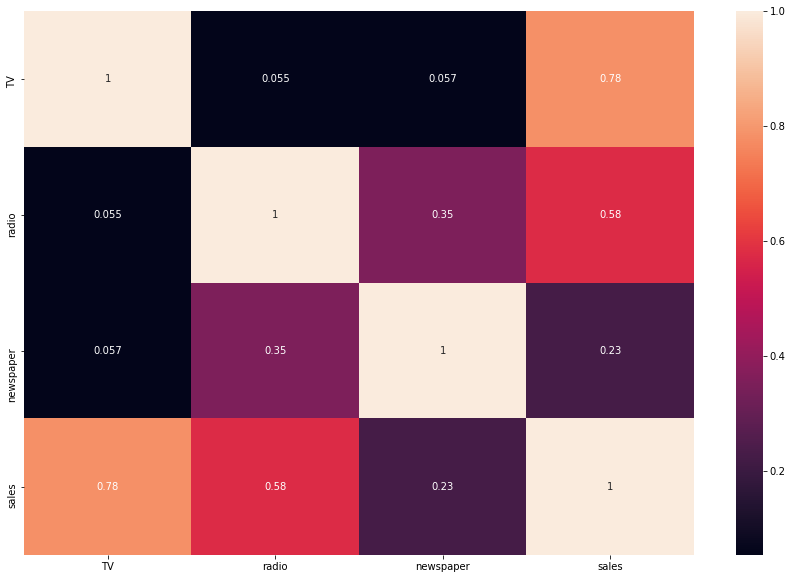

In [18]:
#Heatmap for correlation
plt.figure(figsize=[15,10])
sns.heatmap(df.corr(),annot=True)
plt.show()

### Checking Outliers

<AxesSubplot:>

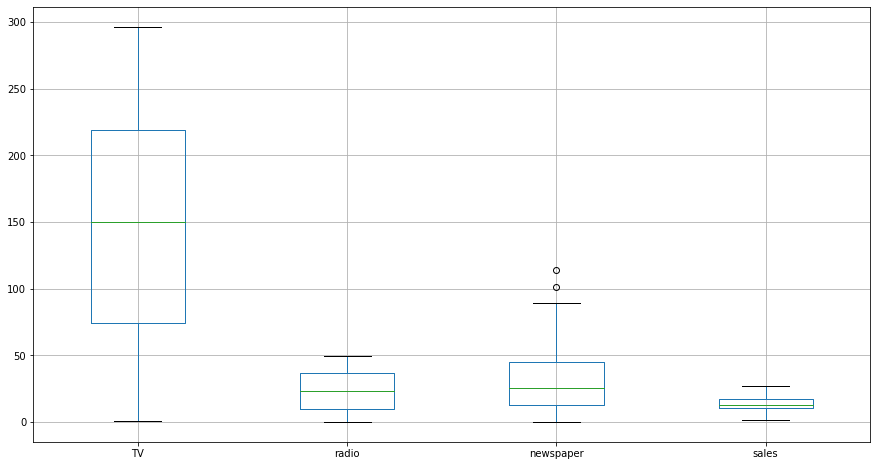

In [19]:
df.boxplot(figsize=[15,8])

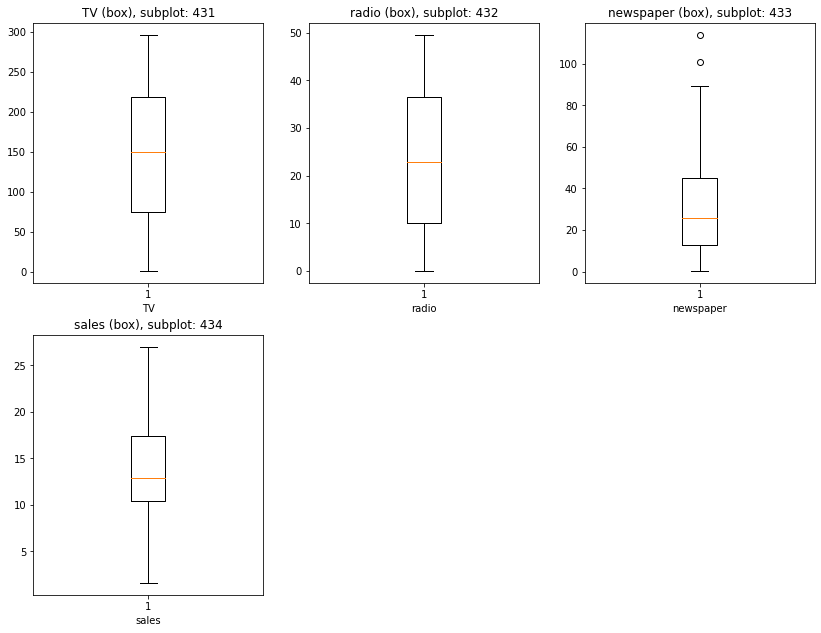

In [20]:
Columns = df.columns

#  plot Numerical Data
a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,22))

for i in Columns:
    

    plt.subplot(a, b, c)
    plt.title('{} (box), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.boxplot(x = df[i])
    c = c + 1

plt.show()

### Splitting the independent and target variables in x and y

In [21]:
x=df.drop("sales",axis=1)
y=df["sales"]

In [22]:
print(x.shape)
print(y.shape)


(200, 3)
(200,)


In [23]:
# Checking skewness
x.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
dtype: float64

In [24]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
x_new=pt.fit_transform(x)

In [25]:
x=x_new


In [26]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x=scale.fit_transform(x)

### Finding Best Random State

Here we find the random state which we will use to build the model.

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

In [28]:
maxScore=0
maxRs=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    predlm=lm.predict(x_test)
    sc=lm.score(x_train,y_train)
    if sc>maxScore:
        maxScore=sc
        maxRs=i
print("Best Accuracy is ", maxScore,"on Random_State",maxRs)

Best Accuracy is  0.9228846311393284 on Random_State 10


We have found best random_state value as 10. We will create our train_test_split using random_state(10)

### Creating Model

We will apply multiple Regression models for checking the r2_score,mean_squared_error, mean_absolute_error.

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10)

In [31]:
models=[LinearRegression(),
        Lasso(), Ridge(),
        ElasticNet(),
        SVR(),
        DecisionTreeRegressor(),
        KNeighborsRegressor(),
        RandomForestRegressor(),
        AdaBoostRegressor(),
        GradientBoostingRegressor(),
      ]
model_names=['LinearRegression',
        'Lasso', 'Ridge',
        'ElasticNet',
        'SVR',
        'DecisionTreeRegressor',
        'KNeighborsRegressor',
        'RandomForestRegressor',
        'AdaBoostRegressor',
        'GradientBoostingRegressor']
r2=[]
mae=[]
mse=[]
rmse=[]
d={}

for model in range(len(models)):
    mod=models[model]
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    r2.append(r2_score(y_test,pred))
    mae.append(mean_absolute_error(y_test,pred))
    mse.append(mean_squared_error(y_test,pred))
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))

    
d={'Modelling Algo':model_names,'R2_score':r2,
   'mean_absolute_error':mae,
   'mean_squared_error':mse,
   'root_mean_squared_error':rmse}
acc_frame=pd.DataFrame(d)
acc_frame


,Modelling Algo,R2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
0,LinearRegression,0.881216,1.597251,4.267944,2.065900
1,Lasso,-0.014407,4.995002,36.448072,6.037224
2,Ridge,0.860674,1.749807,5.006039,2.237418
3,ElasticNet,0.077376,4.756614,33.150286,5.757628
4,SVR,0.877812,1.310290,4.390252,2.095293
5,DecisionTreeRegressor,0.949098,1.098485,1.828939,1.352383
6,KNeighborsRegressor,0.930025,1.102121,2.514236,1.585634
7,RandomForestRegressor,0.976543,0.691515,0.842831,0.918058
8,AdaBoostRegressor,0.961714,0.943283,1.375644,1.172878
9,GradientBoostingRegressor,0.978475,0.608635,0.773414,0.879440


### Checking Cross Validation Score

Here we check cross validation score to find the best Regression Model 

In [32]:
from sklearn.model_selection import cross_val_score
cross=[]
for model in range(len(models)):
    scr=cross_val_score(models[model],x,y,cv=5)
    cross.append(scr.mean())   
difference={'Model name':model_names,'R2_score':r2,"Cross_val_score":cross}
acc_frame=pd.DataFrame(difference)
acc_frame

,Model name,R2_score,Cross_val_score
0,LinearRegression,0.881216,0.897806
1,Lasso,-0.014407,0.117676
2,Ridge,0.860674,0.894037
3,ElasticNet,0.077376,0.104823
4,SVR,0.877812,0.927731
5,DecisionTreeRegressor,0.949098,0.957209
6,KNeighborsRegressor,0.930025,0.952351
7,RandomForestRegressor,0.976543,0.975580
8,AdaBoostRegressor,0.961714,0.949341
9,GradientBoostingRegressor,0.978475,0.977792


##### Minimum difference in R2_score and cross validation score is for GradientBoostingRegressor. So GradientBoostingRegressor is our best model

### Hyper Tuning

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]}

In [35]:
GBR = GridSearchCV(GradientBoostingRegressor(), parameters,cv=5) #Tuning GradientBoostingRegressor

In [36]:
GBR.fit(x_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [51]:
GBR.best_params_ #finding the best parameters for GradientBoostingRegressor hyper tuning

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'